# AIN 214 - PA5 - 2023 on Clustering

This homework aims to deepen your understanding of clustering algorithms and introduce the concept of dimensionality reduction using Principal Component Analysis (PCA). You will use K-Means and Agglomerative Clustering, and explore the impact of PCA on these clustering techniques.



# Student Info
## Name Surname: Muhammet Batuhan Doğan
## Student ID: 2210765004


## Dataset

We will use the Mall Customer Segmentation Data from Kaggle. The dataset is added to the homework folder - also accessible at [here](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/).


## 1. Data Cleaning

* **Objective**: Prepare your dataset for analysis.
* **Tasks**: Handle missing values, encode categorical features, handle outliers.

The steps for data cleaning may vary. I do not expect you to use a spefisific algorithm to handle outliers for example. But **show your work!**


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
path_to_dataset = 'Mall_Customers.csv'
df = pd.read_csv(path_to_dataset)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Our dataset does not contain any missing values. However one of them is non-numerical. To facilitate further analysis, we need to encode this non-numerical feature. Additionally, there is a consideration to potentially exclude the 'CustomerID' feature as it may not be a determining factor in our study. Therefore, our focus will be on the remaining four features: Gender, Age, Annual Income, and Spending Score.


In [3]:
df.drop(columns='CustomerID',inplace=True)

In [4]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [5]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

I did encoding part a bit different way that thinking like binary classification.

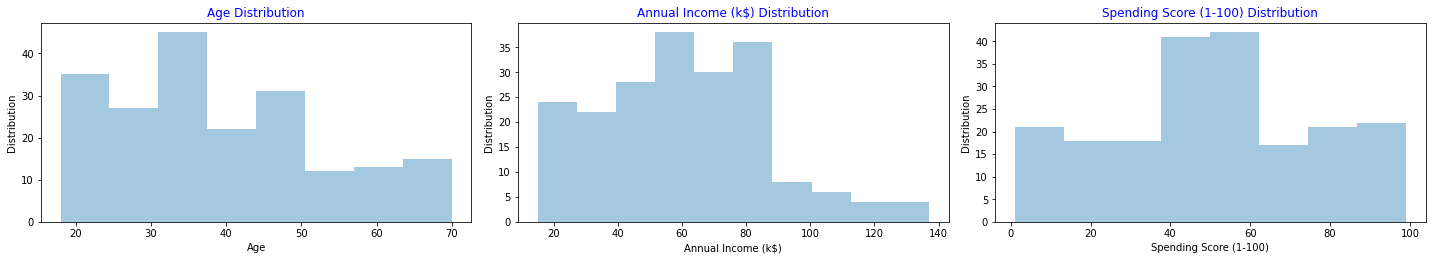

In [6]:
import warnings
warnings.filterwarnings('ignore')
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
f=plt.figure(figsize=(20,20))
for i, col in enumerate(features ):
    ax=f.add_subplot(6,3,i+1)
    sns.distplot(features[col].ffill(),kde=False)
    ax.set_title(col+" Distribution",color='Blue')
    plt.ylabel('Distribution')
f.tight_layout()

In these graph for Age and Spending score i can say there is no outlier but for Annual income there may be outlier.

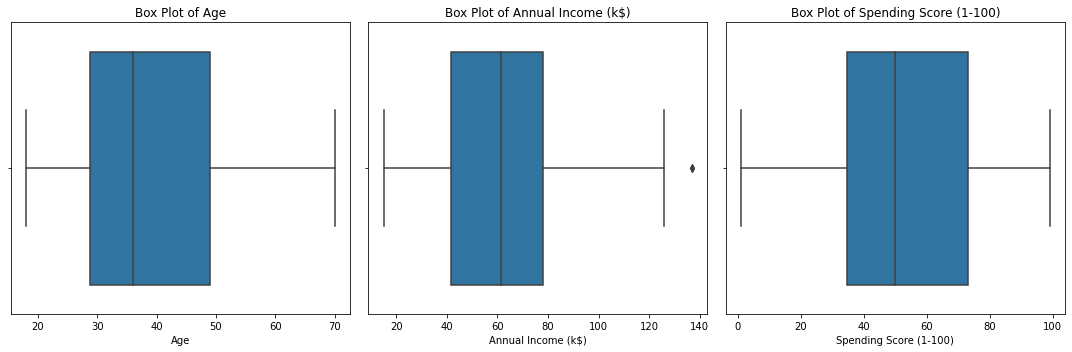

In [7]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Box plot for each feature
plt.figure(figsize=(15, 5))
for i, column in enumerate(features.columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


I choose boxplot technique to see outliers. Age and Spending Score do not have outlier. Annual Income have outliers. We will remove these outlier and we are continue our way with df which does not have outlier

In [8]:
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

outliers = (features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))
df = df[~outliers.any(axis=1)] # we remove outliers


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  198 non-null    int64
 1   Age                     198 non-null    int64
 2   Annual Income (k$)      198 non-null    int64
 3   Spending Score (1-100)  198 non-null    int64
dtypes: int64(4)
memory usage: 7.7 KB


We have done handle missing values, encoding, detecting outliers and remove them.

## 2. Data Preprocessing

* **Objective**: Transform raw data into a format suitable for ML algorithms: PCA, and clustering, such as normalization.

In [10]:
#Normalizing
#We use standardScaler() to normalize our dataset.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_df = scaler.fit_transform(df)


In [11]:
df_scaled = pd.DataFrame(Scaled_df,columns=df.columns)
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.141195,-1.425414,-1.779171,-0.435989
1,-1.141195,-1.282367,-1.779171,1.199413
2,0.876275,-1.353890,-1.739447,-1.720949
3,0.876275,-1.139319,-1.739447,1.043661
4,0.876275,-0.567131,-1.699723,-0.397051


We did normalizing part to continue our way.

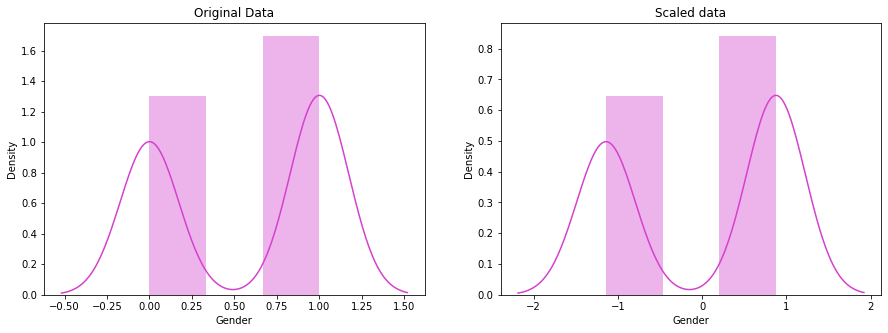

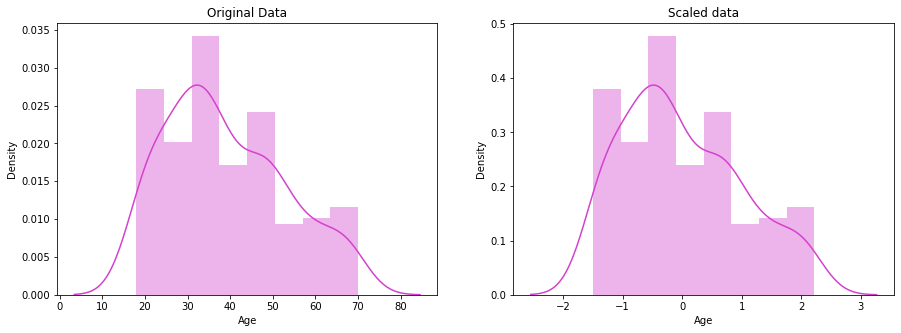

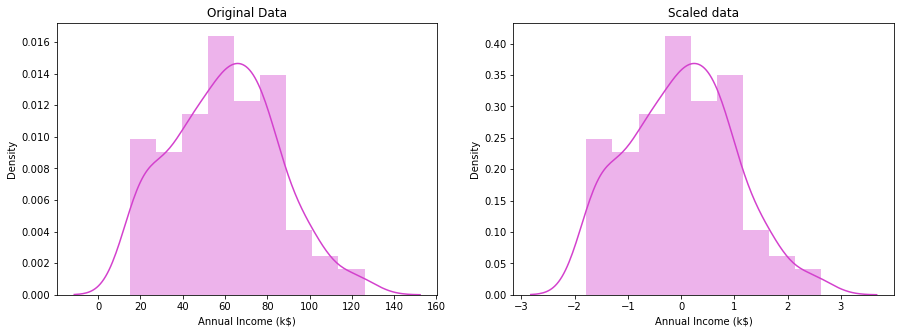

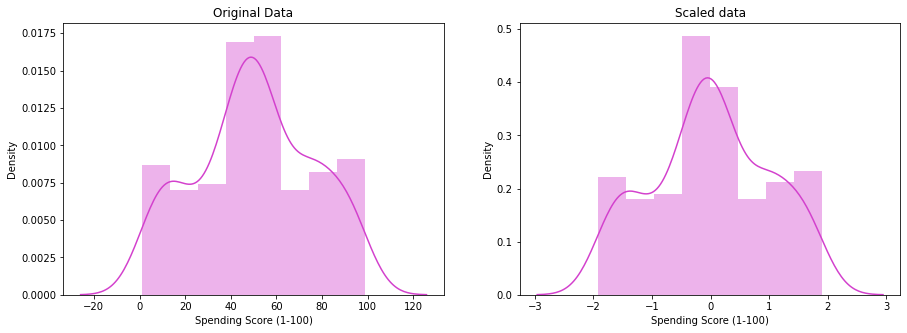

In [12]:
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in features:
    fig, ax=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(df[i], ax=ax[0],color='#D341CD')
    ax[0].set_title("Original Data")
    sns.distplot(df_scaled[i], ax=ax[1],color='#D341CD')
    ax[1].set_title("Scaled data")
    plt.show()

We see our normalization done successfully

## 3. Dimensionality Reduction

### What is Dimensionality Reduction and Why is it Used?
Dimensionality reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. It is an attempt to reduce the complexity of the task as an attempt to remove the curse of dimensionality - also for visualization purposes.

### 3.1. Principal Component Analysis (PCA)
PCA is a technique that transforms original correlated features into new uncorrelated features (principal components) based on variance.
**Process:**
* **Linear Combinations of Features:** PCA begins by creating linear combinations of the existing features in the dataset.
* **First Principal Component:** The first principal component (PC1) is the linear combination that captures the highest variance in the dataset. Mathematically, this is the direction in which the data varies the most.
* **Subsequent Principal Components:** Each following principal component is the linear combination of features that captures the highest variance possible while being orthogonal (perpendicular) to all previously determined principal components. This ensures that each new principal component adds unique information.
* **Covariance Matrix and Eigenvectors:** The process of finding these principal components corresponds to computing the eigenvectors of the covariance matrix of the data. The covariance matrix encapsulates how each pair of variables in the dataset co-varies.
* **Eigenvalues:** The eigenvalues associated with each eigenvector (principal component) indicate the amount of variance that the principal component explains. Larger eigenvalues mean more variance explained.





### 3.2. Apply PCA
* Normalize the data
* Apply PCA to the normalized data using scikit-learn
* Visualize the data with the first two principal components (PC) as the axes. Do you see any clusters?
* Components selection: Visualize the variance explained by each PC. Then choose the number of components that explain the data sufficiently enough.

**Simply use the PCA from sklearn library**

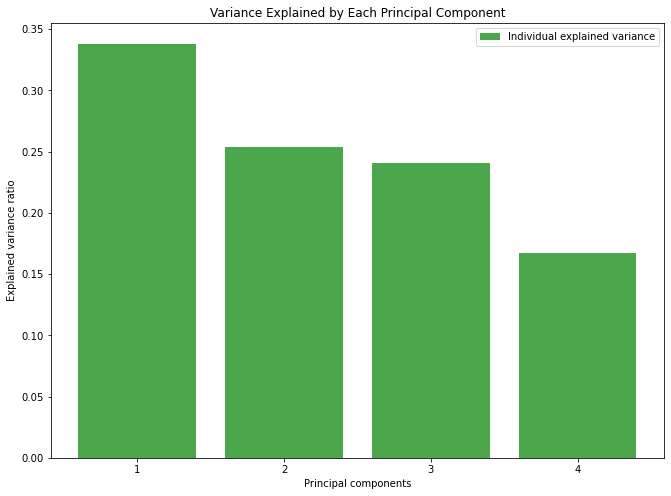

In [13]:
from sklearn.decomposition import PCA

# Applying PCA
pca = PCA(n_components=4)  # Using 4 components to capture all possible variance
df_scaled_pca = pca.fit_transform(df_scaled)

# Explained Variance Ratio for each Principal Component
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting the Explained Variance Ratio
plt.figure(figsize=(11, 8))
plt.bar(range(1, 5), explained_variance_ratio, alpha=0.7, color='green', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Variance Explained by Each Principal Component')
plt.xticks(range(1, 5))
plt.legend()
plt.show()


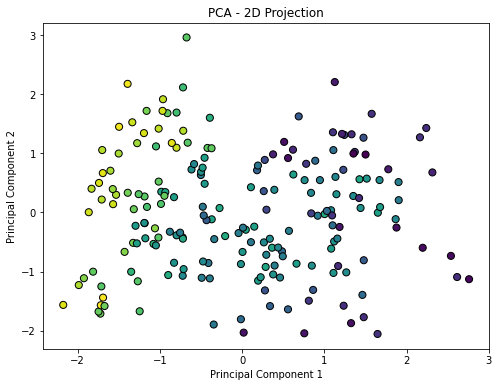

In [14]:
# Visualization in 2D, using the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled_pca[:, 0], df_scaled_pca[:, 1], c=df['Spending Score (1-100)'], cmap='viridis', edgecolor='k', s=50)
plt.title('PCA - 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



In there we can not see exactly any particular cluster

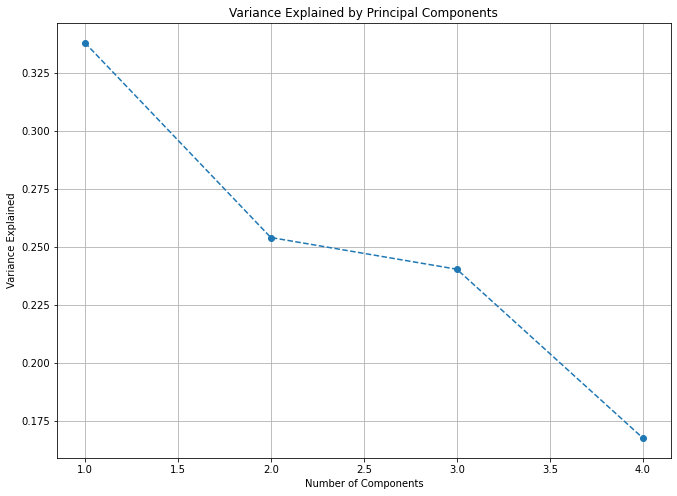

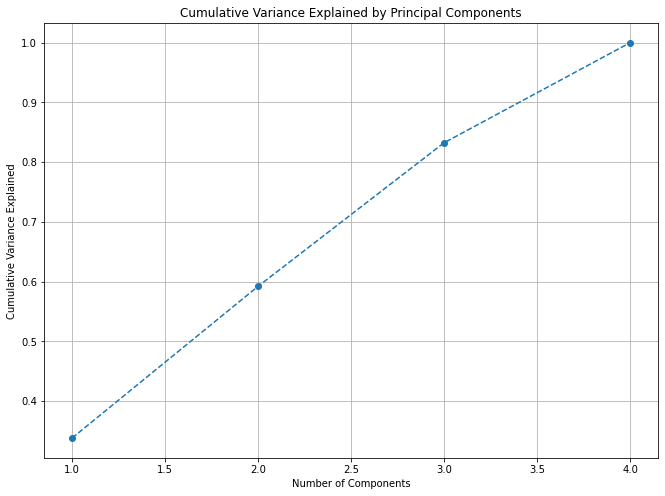

In [15]:
pca = PCA(n_components=4)  # My actual number of components
df_scaled_pca = pca.fit_transform(df_scaled)

# Access the explained_variance_ratio_ attribute from the PCA object
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance ratio for each component
plt.figure(figsize=(11, 8))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.grid(True)
plt.show()


cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(11, 8))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(True)
plt.show()





In there i want to choose 3 number of components but it is not enough to explain data sufficently it is about 82-83 if it is about 90 or above i choose but for under 90 i think it is not true. So i continue my way with all components.

<div style="background-color: red; color: white; padding: 10px;">
    <strong>Should drop the ID column before PCA -3 Pts</strong>
</div>

## 4. Clustering on the Original Dataset

### 4.1. K-Means Clustering on the Original Dataset

Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.

In [16]:
#Modelling
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=0)

In [17]:
kmeans.labels_

array([0, 0, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2, 1, 2, 3, 0, 1, 0, 3, 2, 3, 0,
       1, 0, 1, 0, 1, 0, 1, 2, 3, 2, 3, 0, 1, 2, 1, 2, 1, 2, 1, 0, 3, 2,
       1, 2, 1, 2, 2, 2, 1, 0, 2, 3, 1, 3, 1, 3, 2, 3, 3, 0, 1, 1, 3, 0,
       1, 1, 0, 2, 3, 1, 1, 1, 3, 0, 1, 3, 2, 1, 3, 0, 3, 1, 2, 3, 1, 2,
       2, 1, 1, 0, 3, 1, 2, 0, 1, 2, 3, 0, 2, 1, 3, 0, 3, 2, 1, 3, 3, 3,
       3, 2, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 3, 0, 3, 0, 3, 0,
       2, 2, 3, 2, 1, 0, 3, 2, 1, 0, 2, 2, 3, 0, 3, 2, 1, 0, 3, 0, 1, 2,
       1, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 0, 3, 0, 3, 0, 1, 2,
       3, 0, 3, 0, 1, 2, 3, 2, 1, 0, 1, 0, 1, 2, 1, 2, 3, 2, 1, 2, 1, 0])

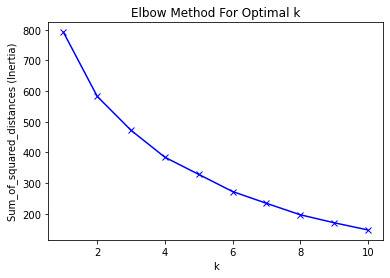

In [18]:
#Elbow Curve
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.show()

I choose optimal k = 4 from Elbow method graph.

In [19]:
#Results
km = KMeans(n_clusters=4)
km.fit(df_scaled)

KMeans(n_clusters=4)

In [20]:
df_kmeans = df_scaled.copy()

In [21]:
cluster_label = km.labels_
df_kmeans['KMEANS_LABELS'] = cluster_label
df_kmeans.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),KMEANS_LABELS
0,-1.141195,-1.425414,-1.779171,-0.435989,1
1,-1.141195,-1.282367,-1.779171,1.199413,1
2,0.876275,-1.353890,-1.739447,-1.720949,2
3,0.876275,-1.139319,-1.739447,1.043661,0
4,0.876275,-0.567131,-1.699723,-0.397051,0


In [22]:
df_kmeans.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'KMEANS_LABELS'],
      dtype='object')

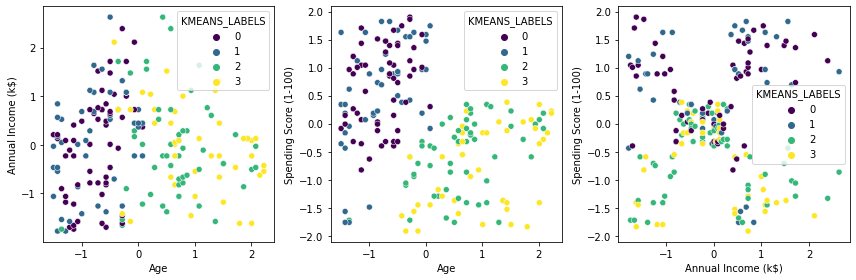

In [23]:

# Assuming your data is in a DataFrame named 'df'
plt.figure(figsize=(12, 4))

# Scatter plot for Age vs. Annual Income
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='KMEANS_LABELS', data=df_kmeans, palette='viridis', legend='full')

# Scatter plot for Age vs. Spending Score
plt.subplot(1, 3, 2)
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='KMEANS_LABELS', data=df_kmeans, palette='viridis', legend='full')

# Scatter plot for Annual Income vs. Spending Score
plt.subplot(1, 3, 3)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMEANS_LABELS', data=df_kmeans, palette='viridis', legend='full')

plt.tight_layout()
plt.show()


I choose 4 for optimal k and then visualize clusters for k = 4.

### 4.2. Hierarchical Agglomerative Clustering (HAC) on the Original Dataset

Apply HAC on the dataset, visualize the dendogram. Then, comment on whether the dendogram agrees with the clusters obtained by K-Means. Try with 2 different linkage methods.

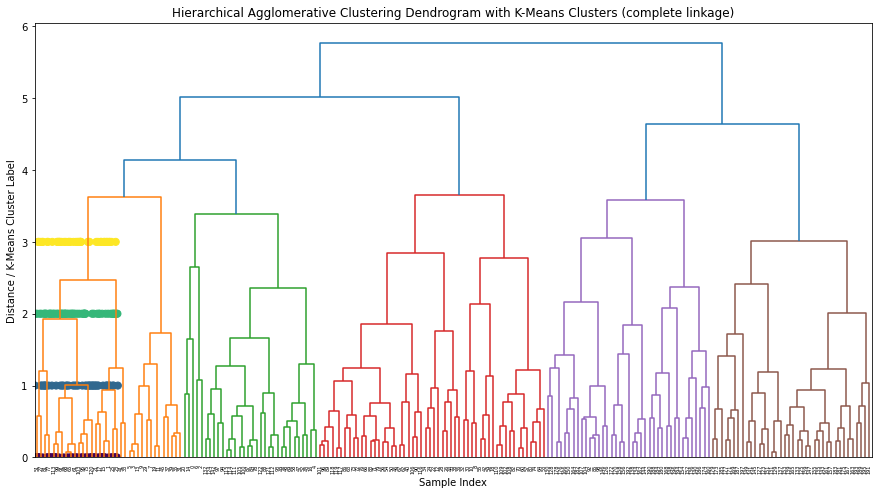

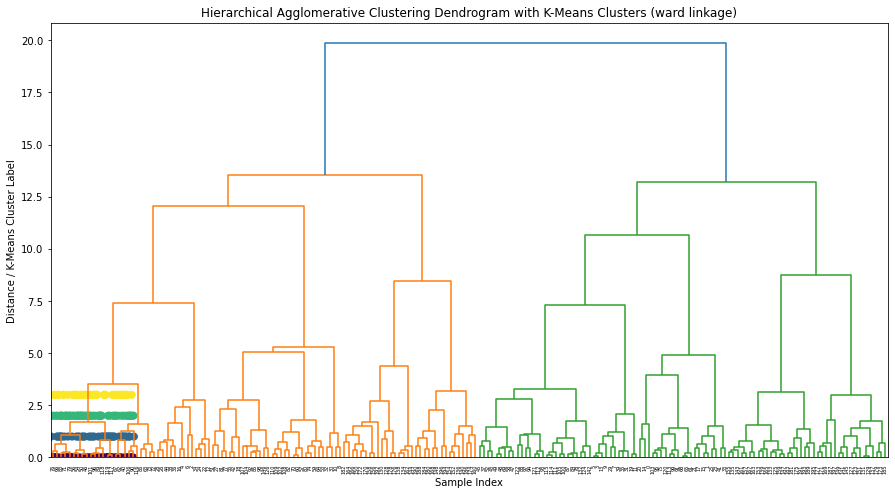

In [24]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

# Perform Hierarchical Agglomerative Clustering with different linkage methods
linkage_methods = ['complete', 'ward']  

for method in linkage_methods:
    # Calculate the linkage matrix
    Z = linkage(df_kmeans.drop('KMEANS_LABELS', axis=1), method=method)

    # Visualize the dendrogram
    plt.figure(figsize=(15, 8))
    dendrogram(Z, labels=df_kmeans.index, orientation='top', distance_sort='descending', show_leaf_counts=True)
    
    # Visualize K-Means clusters
    plt.scatter(df_kmeans.index, df_kmeans['KMEANS_LABELS'], c=df_kmeans['KMEANS_LABELS'], marker='o', cmap='viridis', s=50)
    
    plt.title(f'Hierarchical Agglomerative Clustering Dendrogram with K-Means Clusters ({method} linkage)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance / K-Means Cluster Label')
    plt.show()



When i look complete linkage HAC these dendogram not agrees with kmeans clusters.Such as where kmeans say there are 2 cluster Hac say there are 5 clusters.

But for ward linkage it looks our kmeans and dendogram agress well.

## 5. K-means Clustering with PCA

Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.

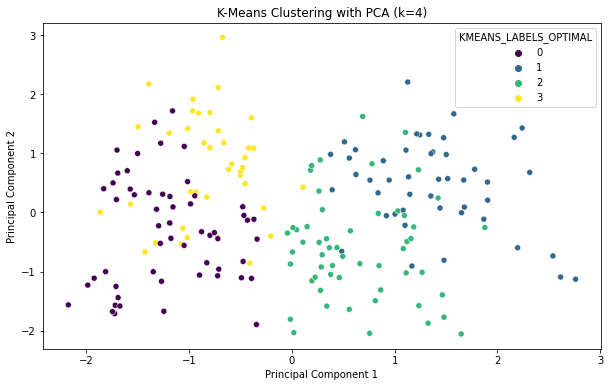

In [25]:
# Choose the optimal k (as identified from the Elbow method)
optimal_k = 4  # Replace this with your optimal k

# Run K-Means with the optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(df_scaled_pca)

# Add cluster labels to the original DataFrame
df_kmeans['KMEANS_LABELS_OPTIMAL'] = kmeans_optimal.labels_

# Visualize the resulting clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled_pca[:, 0], y=df_scaled_pca[:, 1], hue='KMEANS_LABELS_OPTIMAL', data=df_kmeans, palette='viridis', legend='full')
plt.title(f'K-Means Clustering with PCA (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


For these graph we see clusters but  these clusters are not completely separated from each other. So i may say for silhoutte score is not going to close to 1 in silhoutte part it is going to above 0 because we see clusters although not well.

<div style="background-color: red; color: white; padding: 10px;">
    <strong>Cannot see the elbow method, hence, the logic behind choosing the optimal number of clusters. -7 Pts</strong>
</div>

## 6. Evaluate the Clustering Results

* Evaluate and compare the clustering results obtained in 4.1 and 5 (k means with and without PCA) using the Silhouette Coefficients.
* Which is better?

In [26]:
#Silhouette Coefficient for part 4.1 
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range(2,9):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(df_scaled)
    centers = km.cluster_centers_

    score = silhouette_score(df_scaled, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.25090045818546425
For n_clusters = 3, silhouette score is 0.25823652187926
For n_clusters = 4, silhouette score is 0.29845349602545146
For n_clusters = 5, silhouette score is 0.3174177533653616
For n_clusters = 6, silhouette score is 0.3367485930045021
For n_clusters = 7, silhouette score is 0.3598442132866966
For n_clusters = 8, silhouette score is 0.3900315000825682


In [27]:
#Silhouette Coefficient for part 5
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range(2,9):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(df_scaled_pca)
    centers = km.cluster_centers_

    score = silhouette_score(df_scaled_pca, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.25090045818546425
For n_clusters = 3, silhouette score is 0.2579157575498753
For n_clusters = 4, silhouette score is 0.300560655141149
For n_clusters = 5, silhouette score is 0.3174177533653617
For n_clusters = 6, silhouette score is 0.3341365791618806
For n_clusters = 7, silhouette score is 0.3601167483208105
For n_clusters = 8, silhouette score is 0.39149872206846226


For part 4.1 and Part 5 i calculated Silhoutte scores. kmeans with PCA slightly better than kmeans cluster with not PCA.I say this for number of cluster equals four. With PCA it equals to 0.3006 with not PCA it equals to 0.2985.

I wait more difference silhoutte score but they are so close each other. I think this is because of my PCA components variance has close value. None of them dominant on each other well if we look at 3.2 part 'Variance Explained by Each Principal Component' graph we see this. PCA based on variance value so actually getting closer value with pca kmeans and with not pca kmeans make sense from this perspective.

<div style="background-color: red; color: white; padding: 10px;">
    Simply providing the average silhouette score does not suffice to evaluate the whole clustering. This metric, when calculated for each data point and plotted, reveals the distribution of cohesion and separation across all data points, offering a more nuanced view of the clustering effectiveness. Please check the corresponding lab material. -5 Pts
</div>

# REFERENCES
https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/


 # ACKNOWLEDGMENTS

In certain sections of this study, I utilized  AIN212 course slides, AIN214 lab materials mostly, AI tool ChatGPT.